### Single Linear Regression

In [ ]:
import pandas as pd 

In [ ]:
data = pd.read_csv('iris.csv',names = ['SepalLength','SepalWidth',
                'PetalLength',
                'PetalWidth',
                'Species'])

In [ ]:
data.head()

In [ ]:
X = data.iloc[:,0:4]

In [ ]:
y = data['Species']

In [ ]:
"""size = len(y)
for x in range(size):
    if y[x] == 'Setosa':
        y[x] = 0
    elif y[x] == 'Virginica':
        y[x] = 1
    else:
        y[x] = 2"""

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin = LinearRegression()
lin.fit(X,y)

In [ ]:
test = [[6.9,3.2,5.7,2.3]]
testdata = pd.DataFrame(test)

In [ ]:
lin.predict(test)

# CrossValidation 
when you want to compare many algos. and models in the machine learning process we use this method to get the best optimised model for our data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#cross_val_score(LinearSVC(),X,y,cv = 5)
#cross_val_score(DecisionTreeClassifier(),X,y,cv = 5)
cross_val_score(KNeighborsClassifier(),X,y,cv = 5)
#cross_val_score(linear_model.LinearRegression(),X,y,cv = 5)

# Multiple Linear Regression

In [1]:
import pandas as pd

In [7]:
stock = pd.read_csv('economi.csv',
                   names = ['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Price'])
df = pd.DataFrame(stock)
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


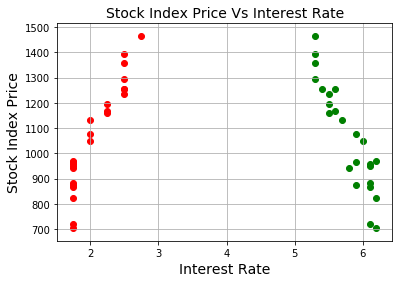

In [8]:
from pandas import DataFrame
import matplotlib.pyplot as plt
plt.scatter(df['Interest_Rate'],
           df['Stock_Price'],color = 'red')
plt.scatter(df['Unemployment_Rate'],
           df['Stock_Price'],color = 'green')
plt.title('Stock Index Price Vs Interest Rate',fontsize = 14)
plt.xlabel('Interest Rate',fontsize = 14)
plt.ylabel('Stock Index Price',fontsize = 14)
plt.grid(True)
plt.show()

In [12]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

X = df[['Interest_Rate','Unemployment_Rate']]
Y = df['Stock_Price']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print('Intercepts:\n',regr.intercept_)
print('Coefficients:\n',regr.coef_)
#prediction with sklearn
New_Interest_Rate = 3.5
New_Unemployment_Rate = 7.3
print('Predict StockIndex Price:\n',
     regr.predict([[New_Interest_Rate,
                   New_Unemployment_Rate]]))

#with statsmodels
X = sm.add_constant(X)
model  = sm.OLS(Y,X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

Intercepts:
 1798.403977625855
Coefficients:
 [ 345.54008701 -250.14657137]
Predict StockIndex Price:
 [1181.72431117]
                            OLS Regression Results                            
Dep. Variable:            Stock_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           4.04e-11
Time:                        13:05:26   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
